In [66]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/thyroid-cancer/Thyroid_Diff.csv


In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


Differentiated Thyroid Cancer Recurrence

Data source: Borzooei, S. & Tarokhian, A. (2023). Differentiated Thyroid Cancer Recurrence [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5632J.

In [68]:
data = pd.read_csv('/kaggle/input/thyroid-cancer/Thyroid_Diff.csv')

In [69]:
data.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [14]:
data.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [16]:
data.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

# Categorical data 

In [17]:
print(data['T'].value_counts())

T
T2     151
T3a     96
T1a     49
T1b     43
T4a     20
T3b     16
T4b      8
Name: count, dtype: int64


In [71]:
import pandas as pd
from tabulate import tabulate

# Descriptive statistics for continuous variables (e.g., Age, Thyroid Function)
def calculate_continuous_stats(data, variable):
    return data[variable].mean(), data[variable].std(), data[variable].min(), data[variable].max(), data[variable].median()

# Descriptive statistics for categorical variables (e.g., Gender, Smoking)
def calculate_categorical_stats(data, variable):
    return data[variable].value_counts()

# List of continuous variables (real numbers)
continuous_vars = ['Age']  # Add any other continuous variables

# List of categorical variables (binary or multi-class categories)
categorical_vars = ['Gender', 'Smoking', 'Hx Smoking', 'Physical Examination', 'Thyroid Function',
                    'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred']

# Prepare the table header
table = [["Variable", "Mean ± Std", "Min", "Max", "Median"]]

# Generate summary for continuous variables
for var in continuous_vars:
    mean, std, min_val, max_val, median = calculate_continuous_stats(data, var)
    table.append([var, f"{mean:.2f} ± {std:.2f}", min_val, max_val, median])

# Generate summary for categorical variables
for var in categorical_vars:
    counts = calculate_categorical_stats(data, var)
    dist = ', '.join([f"{i}: {counts[i]}" for i in counts.index])
    table.append([var, dist, '-', '-', '-'])
# Format the table for display
print(tabulate(table, headers="firstrow", tablefmt="github"))


| Variable             | Mean ± Std                                                                                                                                | Min   | Max   | Median   |
|----------------------|-------------------------------------------------------------------------------------------------------------------------------------------|-------|-------|----------|
| Age                  | 40.87 ± 15.13                                                                                                                             | 15    | 82    | 37.0     |
| Gender               | F: 312, M: 71                                                                                                                             | -     | -     | -        |
| Smoking              | No: 334, Yes: 49                                                                                                                          | -     | -     | -        |
| Hx Smoking           | No: 355, Yes: 2

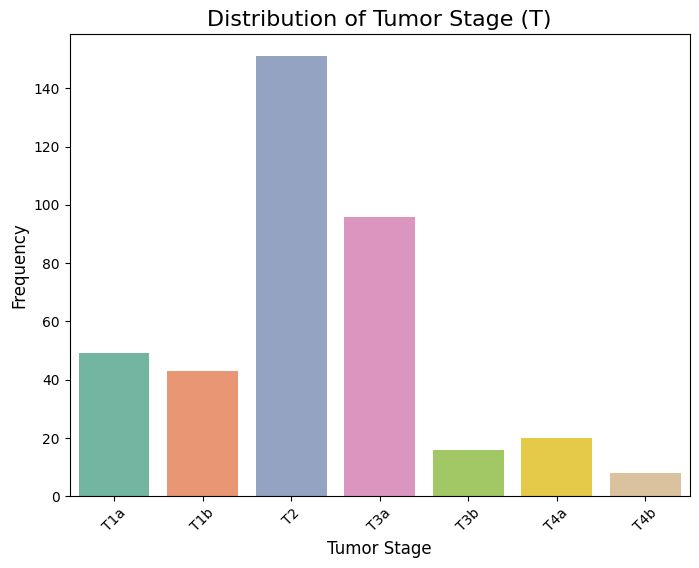

In [18]:
# Plotting the distribution of 'T' using a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='T', data=data, palette='Set2')

# Adding labels and title
plt.title('Distribution of Tumor Stage (T)', fontsize=16)
plt.xlabel('Tumor Stage', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Display the plot
plt.show()

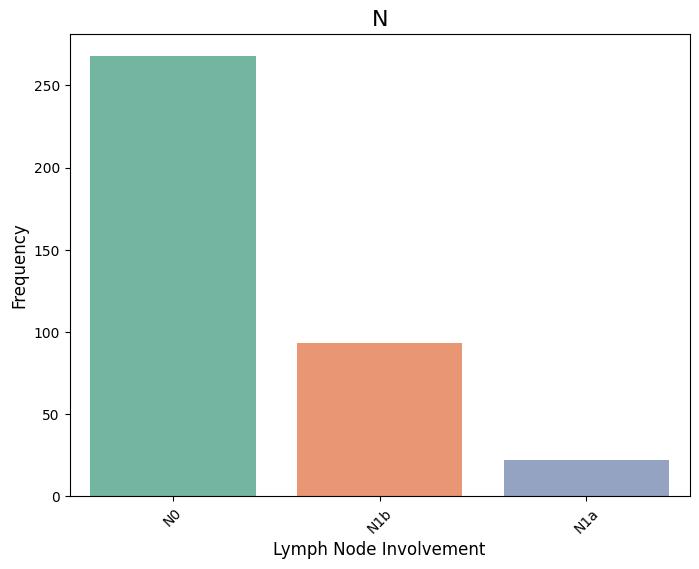

In [19]:
# Plotting the distribution of 'N' using a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='N', data=data, palette='Set2')

# Adding labels and title
plt.title('N', fontsize=16)
plt.xlabel('Lymph Node Involvement', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Display the plot
plt.show()

"Clinicopathological features
The collected patient data included the following variables: age at diagnosis in years, biological sex (Female and Male), current smoking status, past smoking history, history of radiation therapy to the head and neck region, thyroid function (classified as euthyroid, clinical or subclinical hypo/hyperthyroidism), presence of goiter (diffuse, single nodular goiter on the left or right lobe, multinodular, or normal), presence of adenopathy on physical examination (no adenopathy, anterior right, anterior left, bilateral, posterior, or extensive involving all the aformentioned locations), pathological subtype of cancer (papillary, micropapillary, follicular, Hürthle cell), focality (unifocal, multifocal), risk assessment according to ATA guidelines (low, intermediate, high), TNM staging (individual T, N, and M scores, and final stage), initial treatment response (excellent, biochemical incomplete, structurally incomplete, indeterminate), and recurrence status (including both locoregional and distant metastasis)." this paragraph is from this publication--https://link.springer.com/article/10.1007/s00405-023-08299-w. It is copied for convenience of viewing Clinicopathological features description 

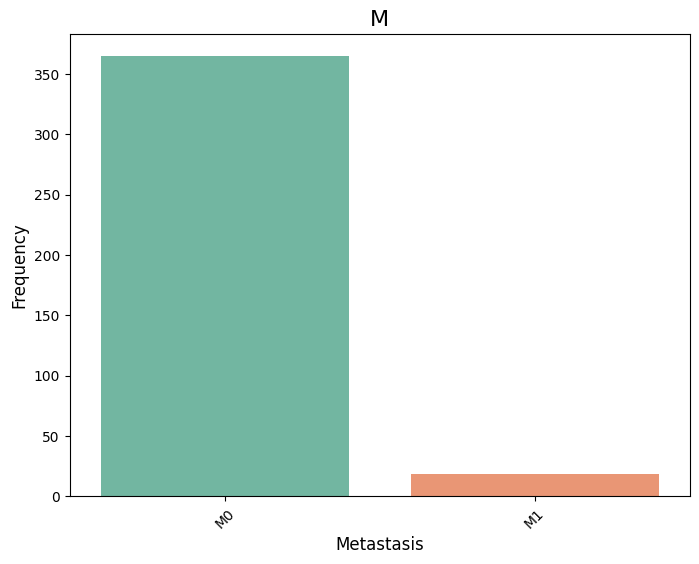

In [20]:
# Plotting the distribution of 'M' using a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='M', data=data, palette='Set2')

# Adding labels and title
plt.title('M', fontsize=16)
plt.xlabel('Metastasis', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Display the plot
plt.show()

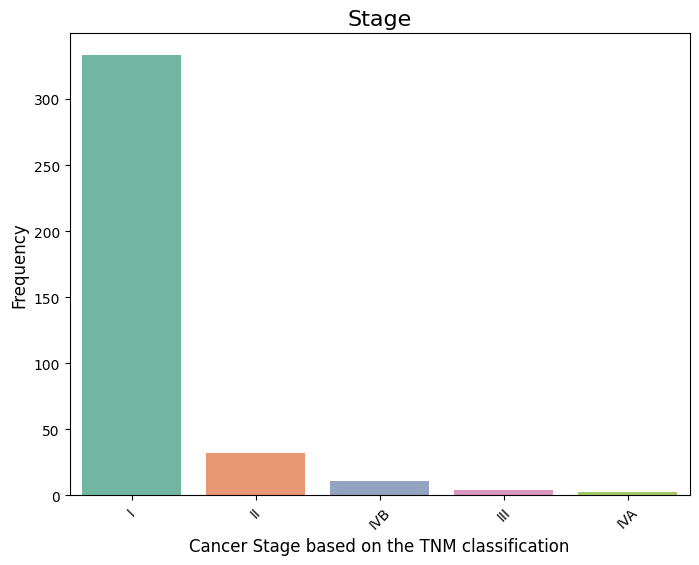

In [21]:
# Plotting the distribution of 'Stage' using a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Stage', data=data, palette='Set2')

# Adding labels and title
plt.title('Stage', fontsize=16)
plt.xlabel('Cancer Stage based on the TNM classification', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Display the plot
plt.show()

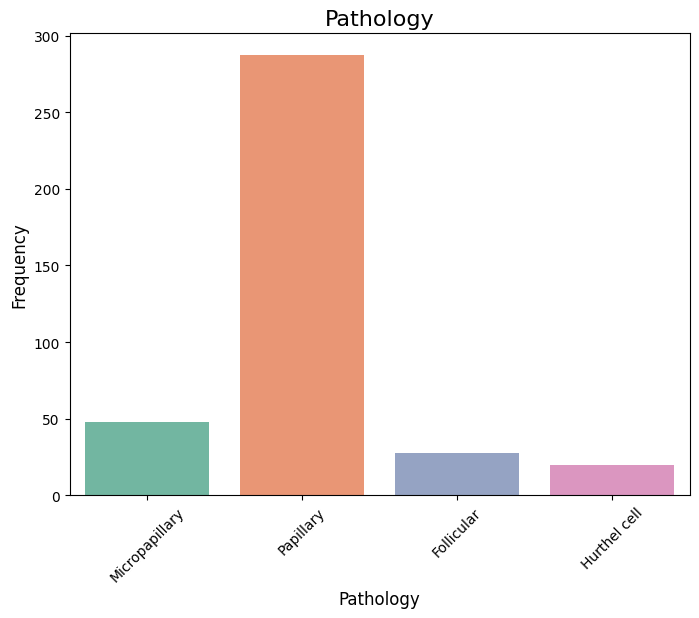

In [22]:
# Plotting the distribution of 'Pathology' using a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Pathology', data=data, palette='Set2')

# Adding labels and title
plt.title('Pathology', fontsize=16)
plt.xlabel('Pathology', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Display the plot
plt.show()

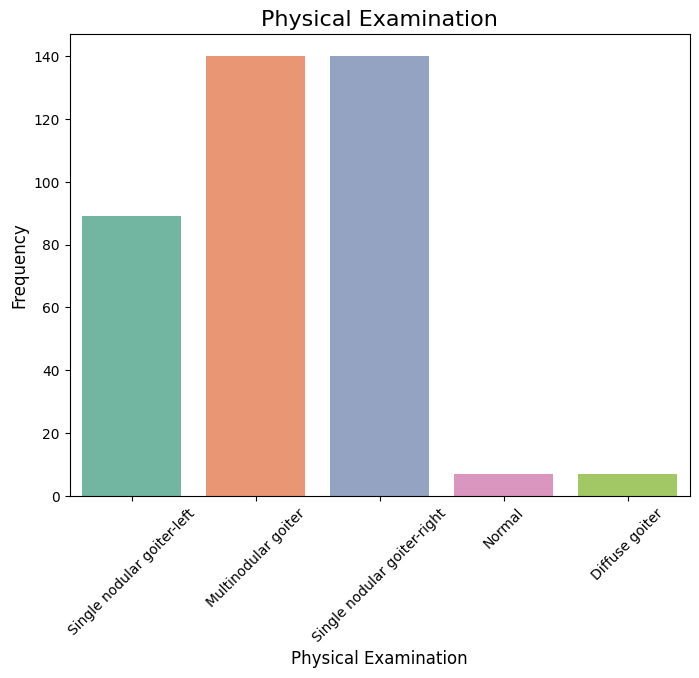

In [23]:
# Plotting the distribution of 'Physical Examination' using a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Physical Examination', data=data, palette='Set2')

# Adding labels and title
plt.title('Physical Examination', fontsize=16)
plt.xlabel('Physical Examination', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Display the plot
plt.show()

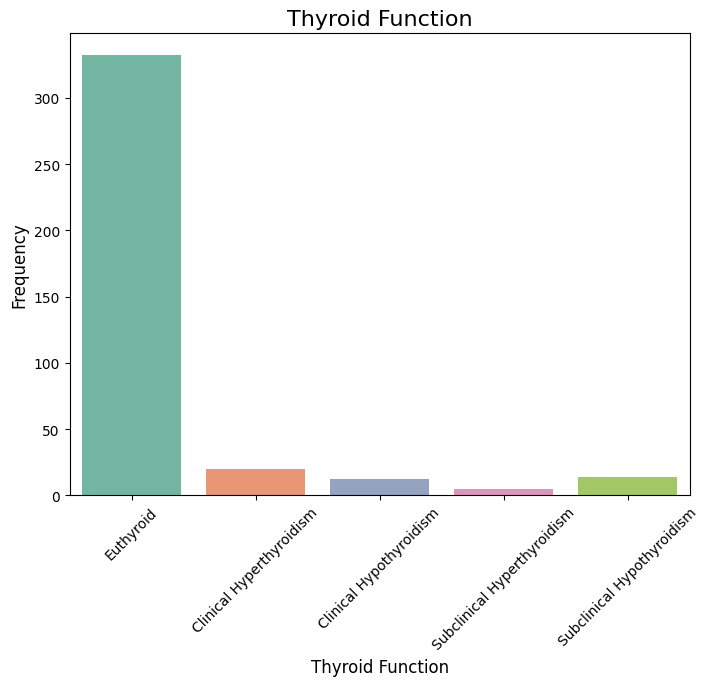

In [24]:
# Plotting the distribution of 'Thyroid Function' using a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Thyroid Function', data=data, palette='Set2')

# Adding labels and title
plt.title('Thyroid Function', fontsize=16)
plt.xlabel('Thyroid Function', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Display the plot
plt.show()

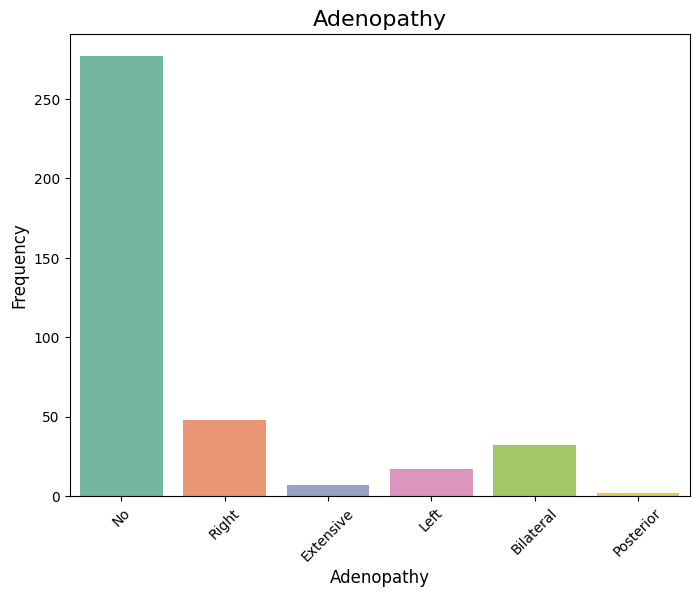

In [25]:
# Plotting the distribution of 'Adenopathy' using a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Adenopathy', data=data, palette='Set2')

# Adding labels and title
plt.title('Adenopathy', fontsize=16)
plt.xlabel('Adenopathy', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Display the plot
plt.show()

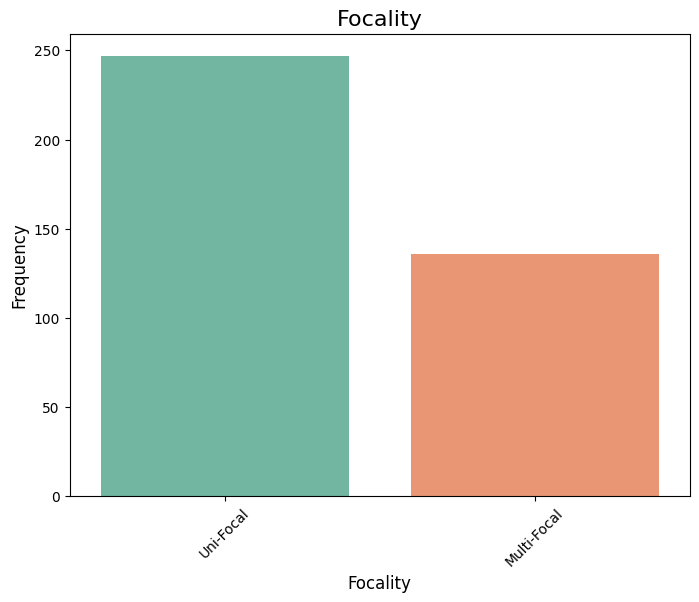

In [26]:
# Plotting the distribution of 'Focality' using a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Focality', data=data, palette='Set2')

# Adding labels and title
plt.title('Focality', fontsize=16)
plt.xlabel('Focality', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Display the plot
plt.show()

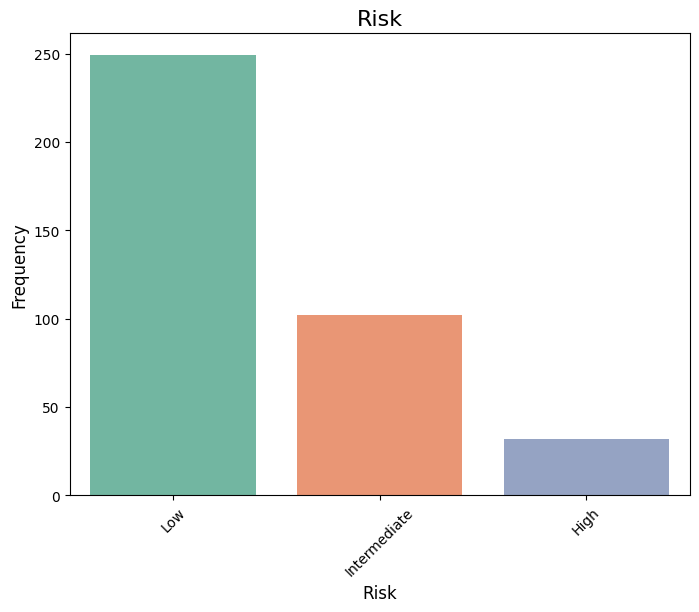

In [27]:
# Plotting the distribution of 'Risk' using a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Risk', data=data, palette='Set2')

# Adding labels and title
plt.title('Risk', fontsize=16)
plt.xlabel('Risk', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Display the plot
plt.show()

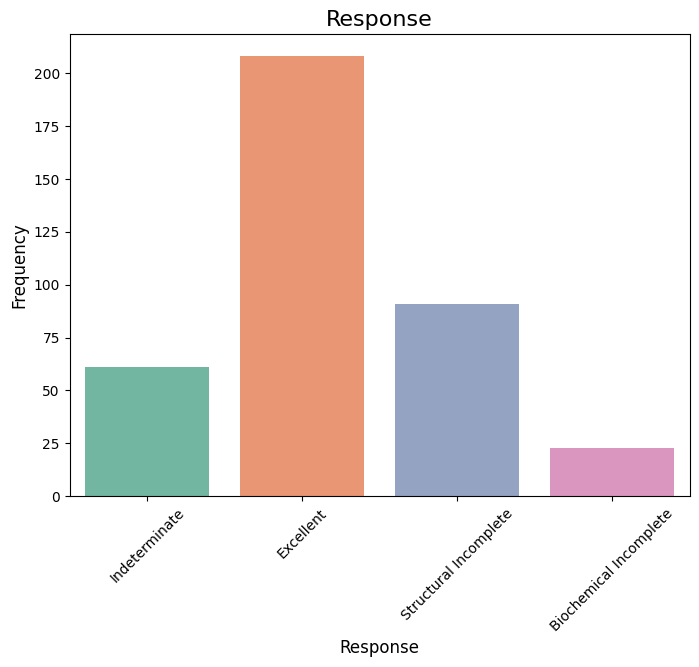

In [28]:
# Plotting the distribution of 'Response' using a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Response', data=data, palette='Set2')

# Adding labels and title
plt.title('Response', fontsize=16)
plt.xlabel('Response', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Display the plot
plt.show()

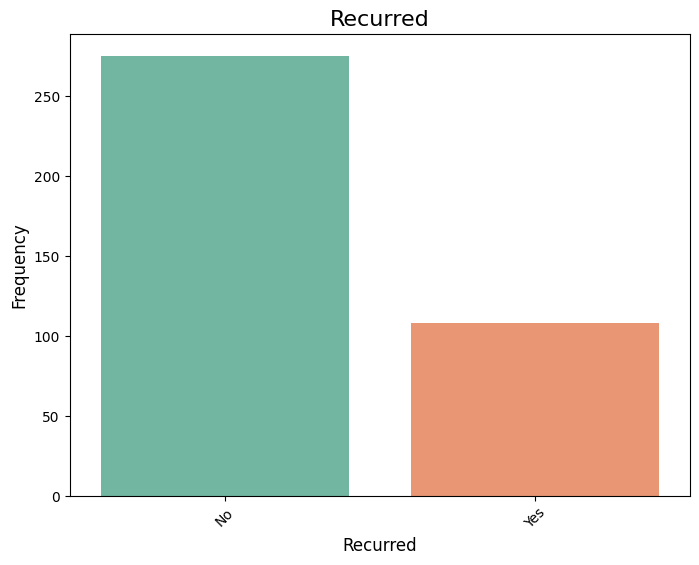

In [29]:
# Plotting the distribution of 'Recurred' using a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Recurred', data=data, palette='Set2')

# Adding labels and title
plt.title('Recurred', fontsize=16)
plt.xlabel('Recurred', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Display the plot
plt.show()

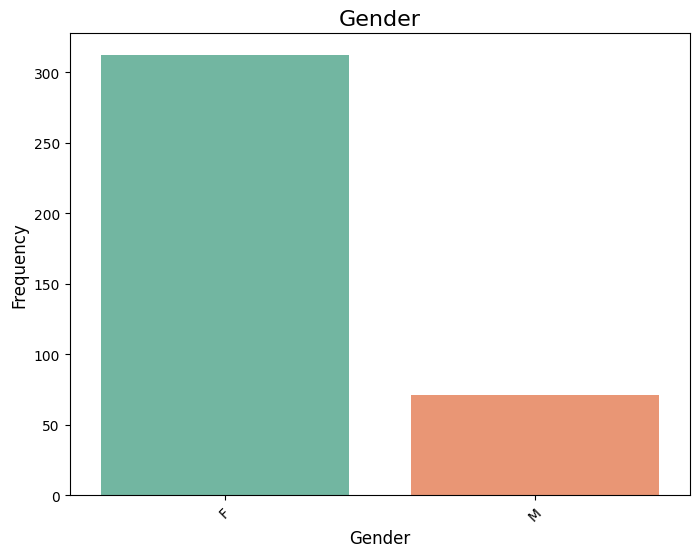

In [30]:
# Plotting the distribution of 'Gender' using a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data, palette='Set2')

# Adding labels and title
plt.title('Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Display the plot
plt.show()

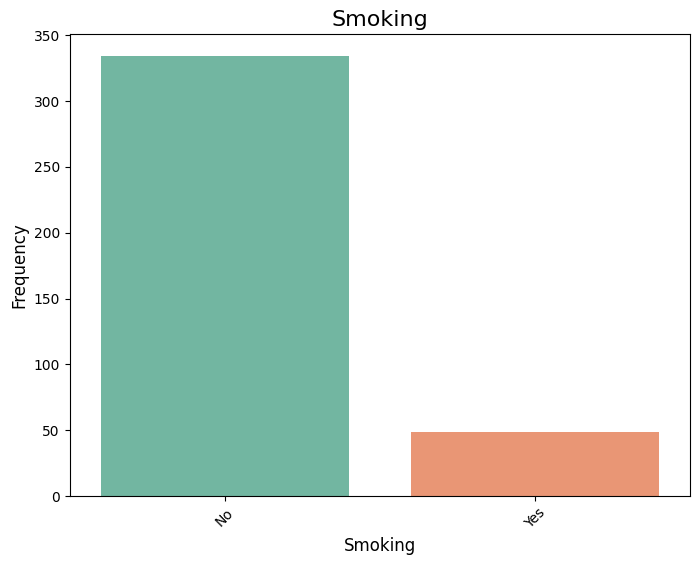

In [31]:
# Plotting the distribution of 'Gender' using a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Smoking', data=data, palette='Set2')

# Adding labels and title
plt.title('Smoking', fontsize=16)
plt.xlabel('Smoking', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Display the plot
plt.show()

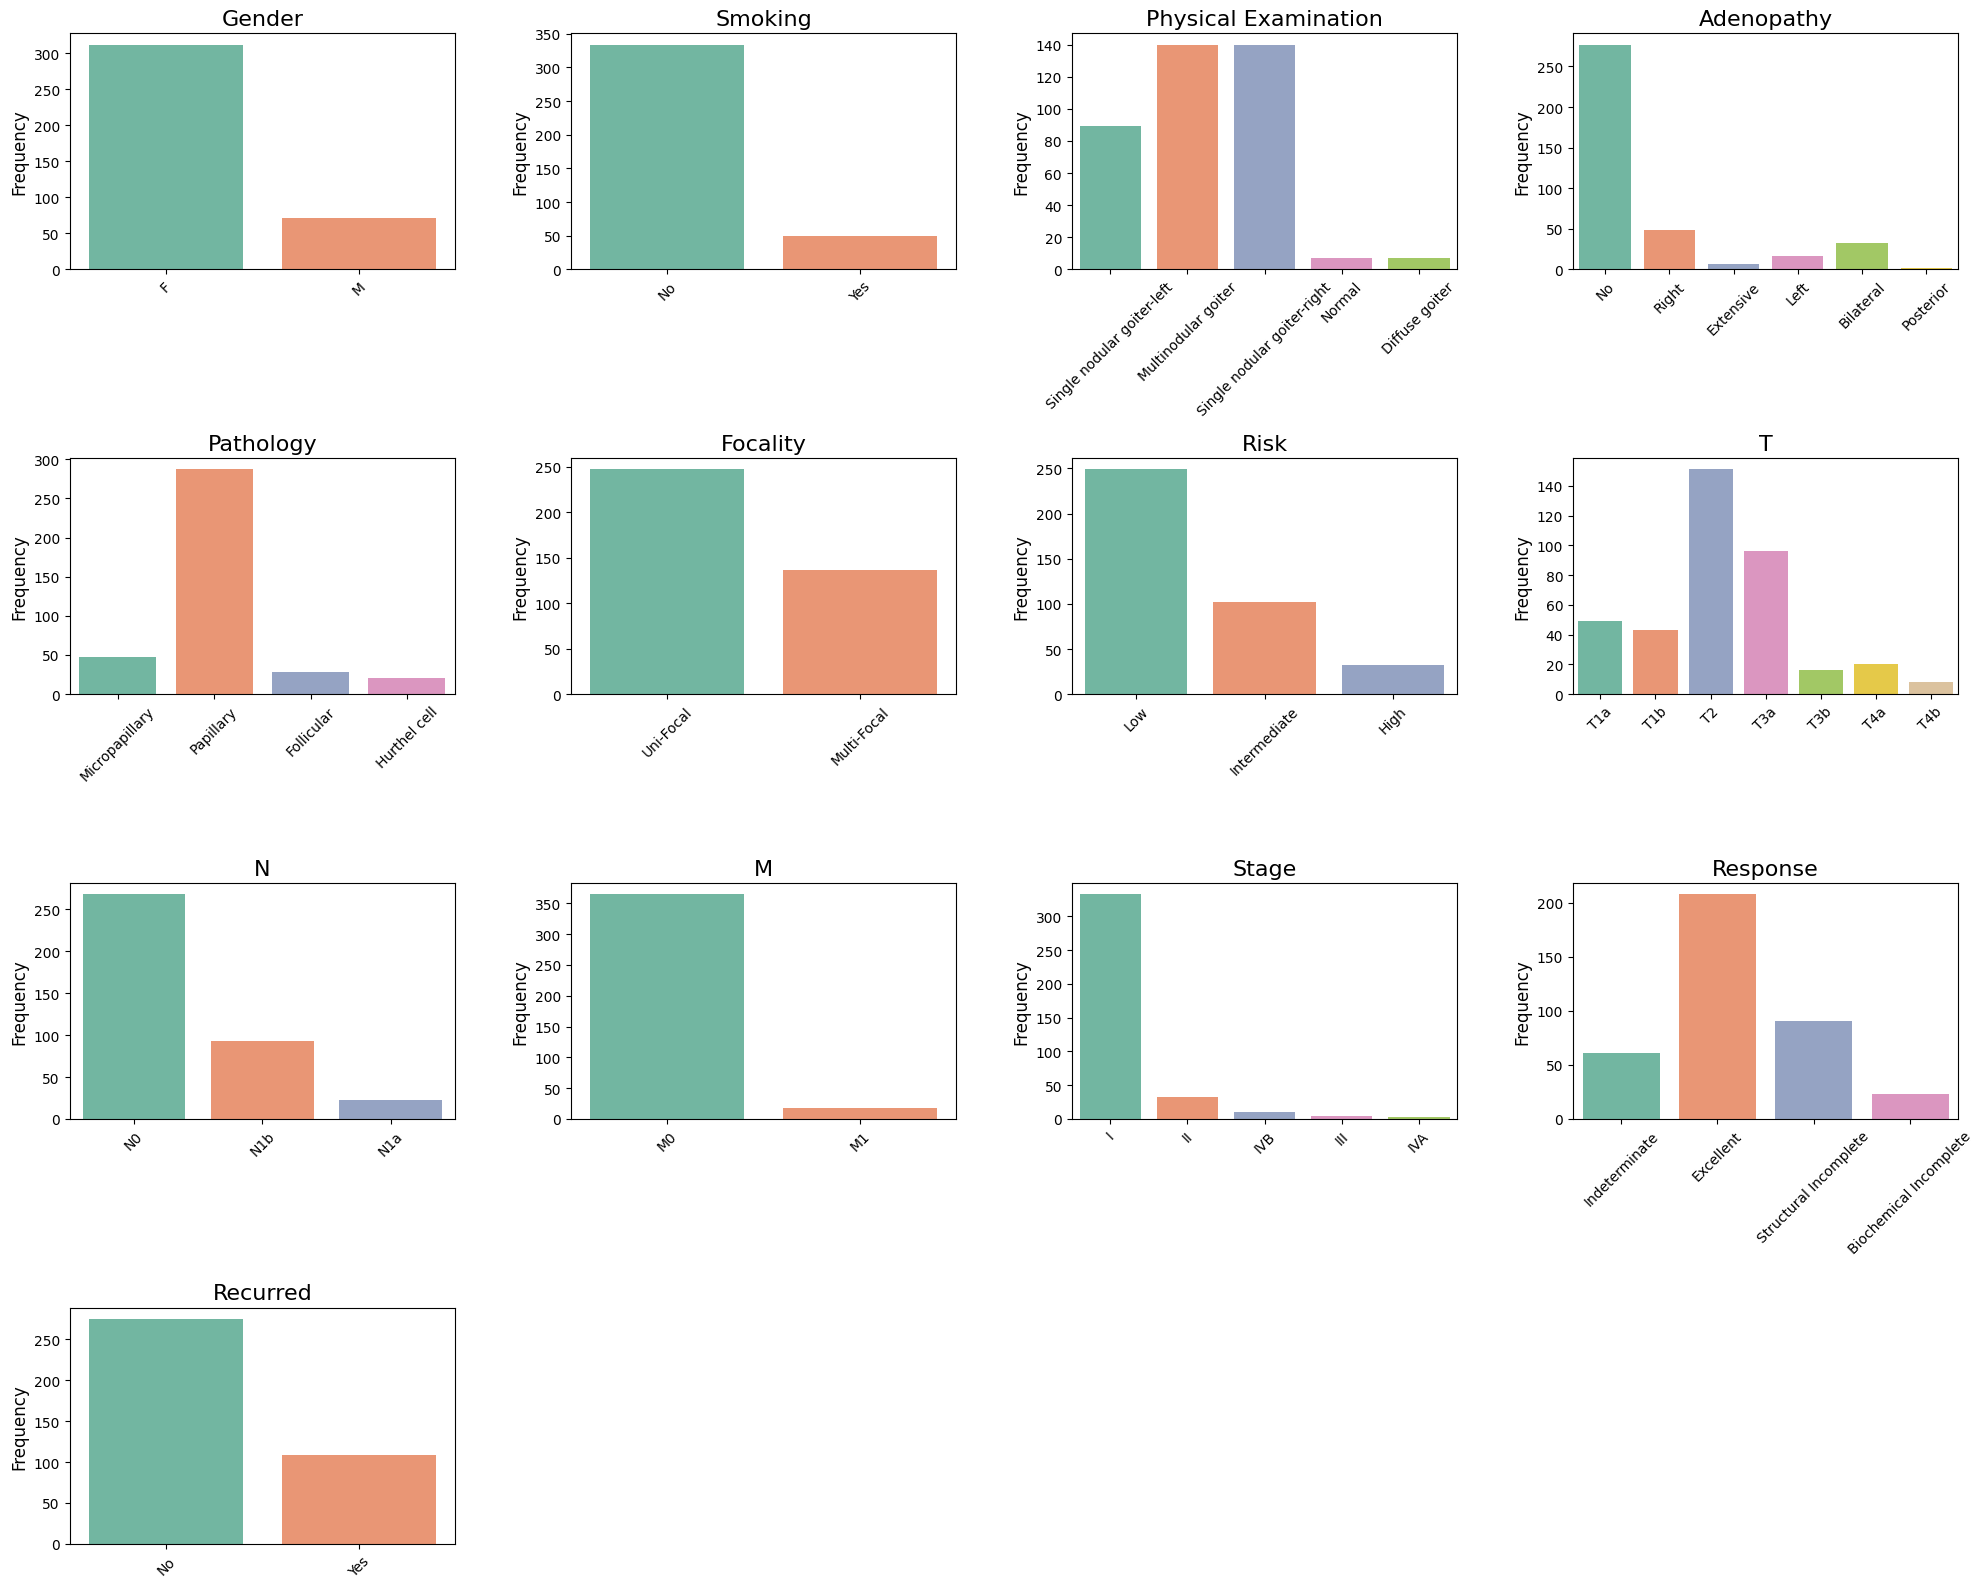

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of variables to plot
categorical_vars = ['Gender', 'Smoking', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred']

# Number of rows and columns for the plot grid
num_rows = 4  # Increase the rows to 4 to fit all 13 variables
num_cols = 4 # You can keep the columns at 4 for a cleaner look

# Create a figure and axes for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 16))  # Adjusted figsize for better space

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot for categorical variables
for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, data=data, palette='Set2', ax=axes[i])
    axes[i].set_title(var, fontsize=16)  # Set the title at the top of the graph
    axes[i].set_ylabel('Frequency', fontsize=12)  # Keep y-axis label for frequency
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    axes[i].set_xlabel('')  # Remove the x-axis label (bottom title)

# Hide any extra subplots (if we have fewer than 16 variables)
for i in range(len(categorical_vars), len(axes)):
    axes[i].axis('off')  # Hide empty subplots
    
# Adjust layout to provide space between plots
plt.tight_layout()

# Additional space adjustments
plt.subplots_adjust(hspace=0.8, wspace=0.3)  # Adjust the vertical and horizontal spacing between subplots

# Display the plot
plt.show()


In [33]:
data.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [54]:


# Encode categorical variables (e.g., Gender, Smoking, etc.)
label_encoder = LabelEncoder()

# Encode columns with categorical values
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Smoking'] = label_encoder.fit_transform(data['Smoking'])
data['Hx Smoking'] = label_encoder.fit_transform(data['Hx Smoking'])
data['Hx Radiothreapy'] = label_encoder.fit_transform(data['Hx Radiothreapy'])
data['Thyroid Function'] = label_encoder.fit_transform(data['Thyroid Function'])
data['Physical Examination'] = label_encoder.fit_transform(data['Physical Examination'])
data['Adenopathy'] = label_encoder.fit_transform(data['Adenopathy'])
data['Pathology'] = label_encoder.fit_transform(data['Pathology'])
data['Focality'] = label_encoder.fit_transform(data['Focality'])
data['Risk'] = label_encoder.fit_transform(data['Risk'])
data['Stage'] = label_encoder.fit_transform(data['Stage'])
data['Response'] = label_encoder.fit_transform(data['Response'])
data['Recurred'] = label_encoder.fit_transform(data['Recurred'])
data['T'] = label_encoder.fit_transform(data['T'])
data['N'] = label_encoder.fit_transform(data['N'])
data['M'] = label_encoder.fit_transform(data['M'])

# Check the data again after encoding
data.head()


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0
1,34,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1,0
2,30,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
3,62,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
4,62,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1,0


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Age                   383 non-null    int64
 1   Gender                383 non-null    int64
 2   Smoking               383 non-null    int64
 3   Hx Smoking            383 non-null    int64
 4   Hx Radiothreapy       383 non-null    int64
 5   Thyroid Function      383 non-null    int64
 6   Physical Examination  383 non-null    int64
 7   Adenopathy            383 non-null    int64
 8   Pathology             383 non-null    int64
 9   Focality              383 non-null    int64
 10  Risk                  383 non-null    int64
 11  T                     383 non-null    int64
 12  N                     383 non-null    int64
 13  M                     383 non-null    int64
 14  Stage                 383 non-null    int64
 15  Response              383 non-null    int64
 16  Recurred

In [35]:
print(data['Gender'].value_counts())

Gender
0    312
1     71
Name: count, dtype: int64


In [36]:
# Frequency of categorical variables
print(data['T'].value_counts())
print(data['N'].value_counts())
print(data['M'].value_counts())
print(data['Stage'].value_counts())
print(data['Response'].value_counts())
print(data['Recurred'].value_counts())
print(data['Focality'].value_counts())
print(data['Hx Radiothreapy'].value_counts())


T
2    151
3     96
0     49
1     43
5     20
4     16
6      8
Name: count, dtype: int64
N
0    268
2     93
1     22
Name: count, dtype: int64
M
0    365
1     18
Name: count, dtype: int64
Stage
0    333
1     32
4     11
2      4
3      3
Name: count, dtype: int64
Response
1    208
3     91
2     61
0     23
Name: count, dtype: int64
Recurred
0    275
1    108
Name: count, dtype: int64
Focality
1    247
0    136
Name: count, dtype: int64
Hx Radiothreapy
0    376
1      7
Name: count, dtype: int64


Key Variables:
T (Tumor Size/Extent):

T2 (most common), T3a, T1a are frequent.
Larger tumors (T3, T4) indicate higher recurrence risk.
N (Lymph Node Involvement):

N0 (no involvement) is common, while N1b and N1a indicate lymph node spread.
Lymph node involvement increases recurrence risk.

M (Metastasis):

M0 (no metastasis) is common, but M1 (distant metastasis) significantly increases recurrence risk.

 Stage:

Stage 0 (early, no recurrence), Stage 4 (advanced, higher recurrence risk).
Stage reflects a combination of T, N, and M.
Response to Treatment:

Response 1 (good response) lowers recurrence, while Response 3 (poor response) increases the likelihood of recurrence.
Recurred (Outcome):

The target variable for recurrence prediction: 108 cases of recurrence, 275 non-recurrence.

In [37]:
# Basic summary statistics
print(data.describe())

# Frequency of categorical variables
print(data['Gender'].value_counts())
print(data['Risk'].value_counts())
print(data['Stage'].value_counts())


              Age      Gender     Smoking  Hx Smoking  Hx Radiothreapy  \
count  383.000000  383.000000  383.000000  383.000000       383.000000   
mean    40.866841    0.185379    0.127937    0.073107         0.018277   
std     15.134494    0.389113    0.334457    0.260653         0.134126   
min     15.000000    0.000000    0.000000    0.000000         0.000000   
25%     29.000000    0.000000    0.000000    0.000000         0.000000   
50%     37.000000    0.000000    0.000000    0.000000         0.000000   
75%     51.000000    0.000000    0.000000    0.000000         0.000000   
max     82.000000    1.000000    1.000000    1.000000         1.000000   

       Thyroid Function  Physical Examination  Adenopathy   Pathology  \
count        383.000000            383.000000  383.000000  383.000000   
mean           1.950392              2.561358    2.924282    2.550914   
std            0.630917              1.350110    1.172106    0.890257   
min            0.000000              0.00

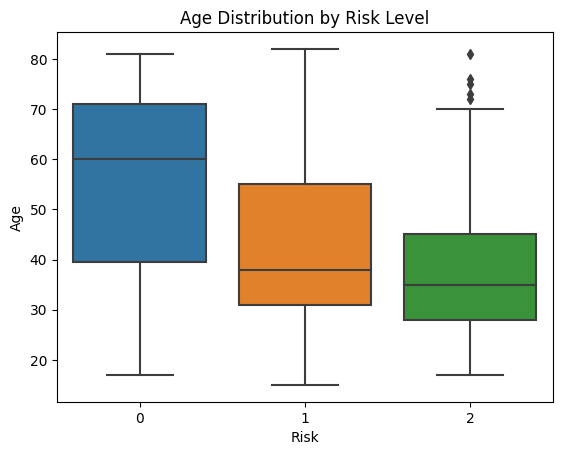

In [38]:
# Age distribution based on Risk
sns.boxplot(x='Risk', y='Age', data=data)
plt.title('Age Distribution by Risk Level')
plt.show()


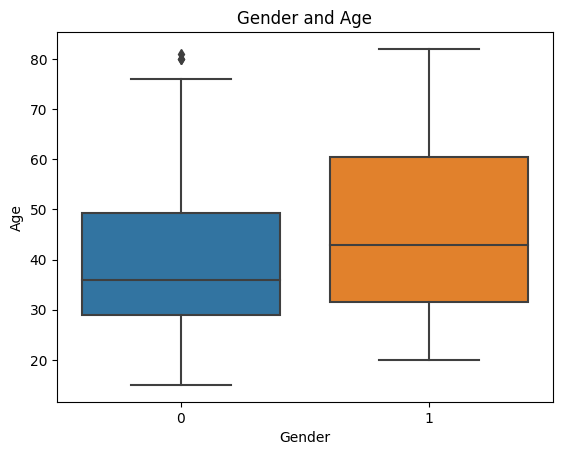

In [39]:
# Age distribution based on Risk
sns.boxplot(x='Gender', y='Age', data=data)
plt.title('Gender and Age')
plt.show()

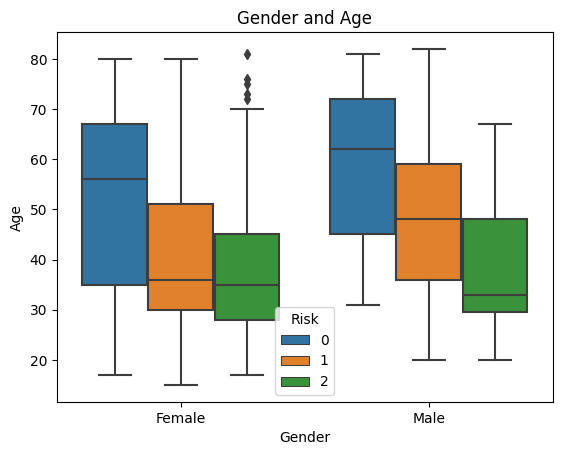

In [40]:
# Age,gender distribution based on Risk
data['Gender'] = data['Gender'].map({0: 'Female', 1: 'Male'})
sns.boxplot(x='Gender', y='Age', hue='Risk', data=data)
plt.title('Gender and Age')
plt.show()

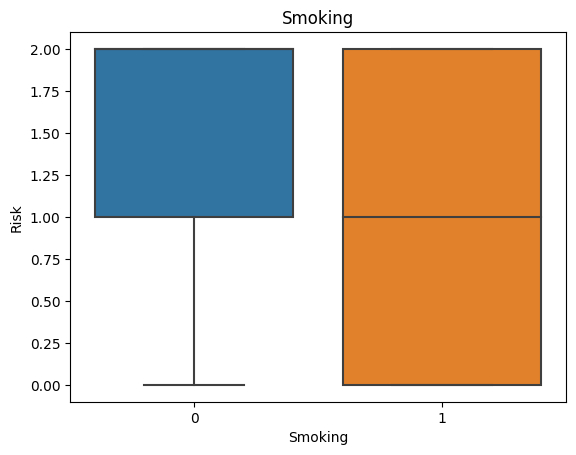

In [41]:
# Smoking
sns.boxplot(x='Smoking', y='Risk', data=data)
plt.title('Smoking')
plt.show()

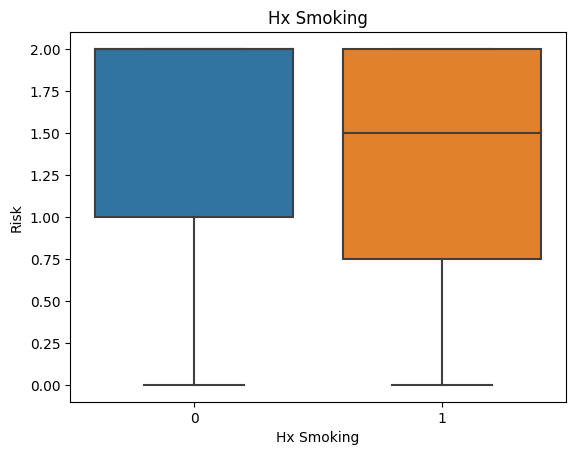

In [42]:
# Hx Smoking
sns.boxplot(x='Hx Smoking', y='Risk', data=data)
plt.title('Hx Smoking')
plt.show()



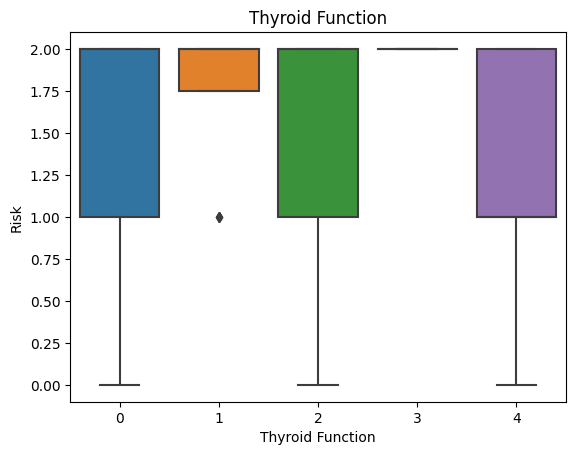

In [43]:
# thyroid function
sns.boxplot(x='Thyroid Function', y='Risk', data=data)
plt.title('Thyroid Function')
plt.show()

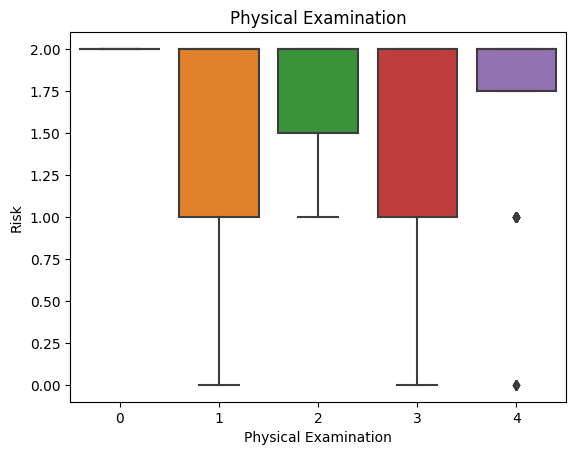

In [44]:
# Physical Examination
sns.boxplot(x='Physical Examination', y='Risk', data=data)
plt.title('Physical Examination')
plt.show()

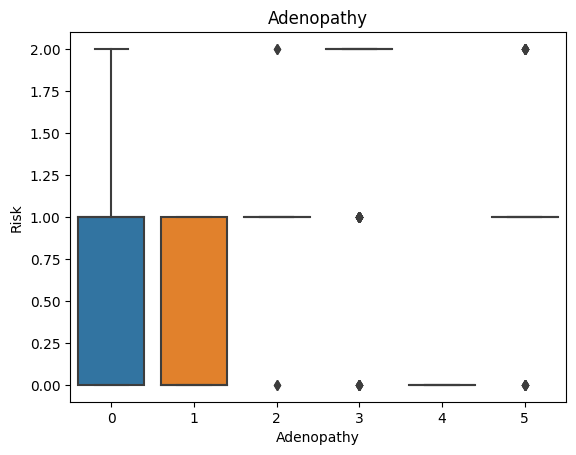

In [45]:
# Adenopathy
sns.boxplot(x='Adenopathy', y='Risk', data=data)
plt.title('Adenopathy')
plt.show()

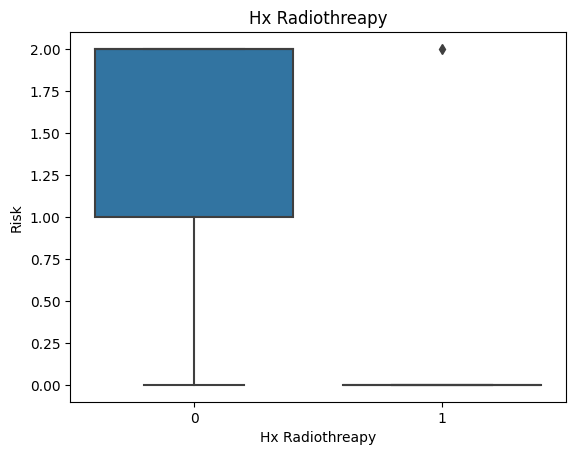

In [46]:
# Hx Radiothreapy
sns.boxplot(x='Hx Radiothreapy', y='Risk', data=data)
plt.title('Hx Radiothreapy')
plt.show()

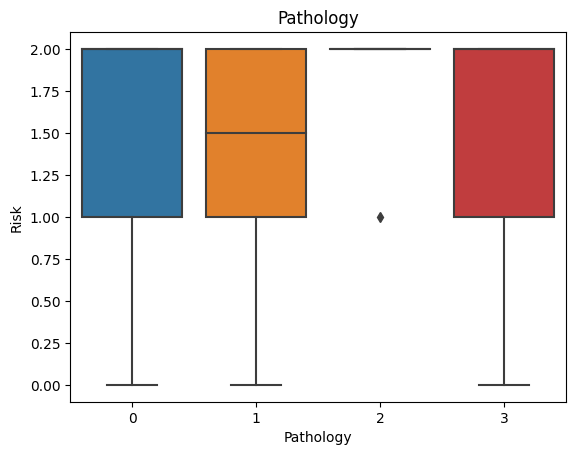

In [47]:
# Pathology
sns.boxplot(x='Pathology', y='Risk', data=data)
plt.title('Pathology')
plt.show()

In [48]:
risk_counts = data['Risk'].value_counts()

# Display the counts for each unique value in the 'Risk' column
print(risk_counts)
# imbalanced dataset 

Risk
2    249
1    102
0     32
Name: count, dtype: int64


              precision    recall  f1-score   support

           0       0.94      0.96      0.95        83
           1       0.90      0.84      0.87        32

    accuracy                           0.93       115
   macro avg       0.92      0.90      0.91       115
weighted avg       0.93      0.93      0.93       115



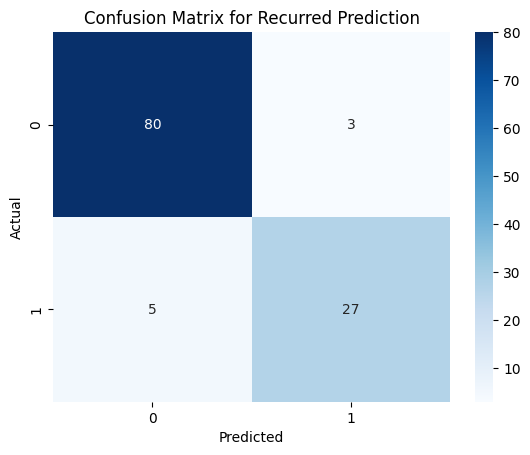

In [59]:
# Logistic Regression
# Select the features and target variable
X = data[['Age','Smoking', 'Hx Radiothreapy','N', 'T','M', 'Stage','Response',]]
y = data['Recurred']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Recurred Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        83
           1       0.94      0.94      0.94        32

    accuracy                           0.97       115
   macro avg       0.96      0.96      0.96       115
weighted avg       0.97      0.97      0.97       115



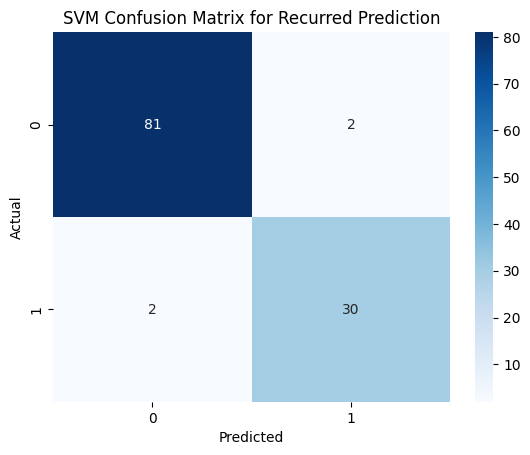

In [60]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Fit SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix for Recurred Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95        83
           1       0.85      0.88      0.86        32

    accuracy                           0.92       115
   macro avg       0.90      0.91      0.90       115
weighted avg       0.92      0.92      0.92       115



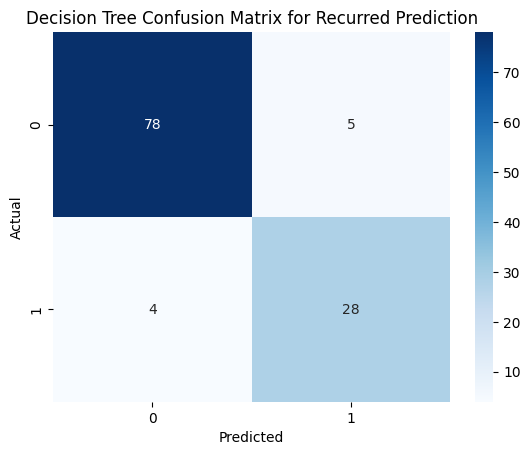

In [61]:
from sklearn.tree import DecisionTreeClassifier

# Fit Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix for Recurred Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [62]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Assuming the data is already preprocessed and the target variable 'Recurred' is available
X = data[['Age','Smoking', 'Hx Radiothreapy','N', 'T','M', 'Stage','Response']]
y = data['Recurred']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the models
svm_model = SVC(kernel='linear', random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
log_reg_model = LogisticRegression(max_iter=200, random_state=42)

# Fit the models
svm_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
log_reg_model.fit(X_train, y_train)

# Get classification reports for each model
svm_report = classification_report(y_test, svm_model.predict(X_test), output_dict=True)
dt_report = classification_report(y_test, dt_model.predict(X_test), output_dict=True)
log_reg_report = classification_report(y_test, log_reg_model.predict(X_test), output_dict=True)

# Convert the classification reports to dataframes
svm_df = pd.DataFrame(svm_report).transpose()
dt_df = pd.DataFrame(dt_report).transpose()
log_reg_df = pd.DataFrame(log_reg_report).transpose()

# Combine the results into one table
metrics_df = pd.DataFrame({
    'SVM': svm_df['f1-score'],
    'Decision Tree': dt_df['f1-score'],
    'Logistic Regression': log_reg_df['f1-score']
}).transpose()

# Add accuracy and other metrics to the table
metrics_df['Accuracy'] = [svm_report['accuracy'], dt_report['accuracy'], log_reg_report['accuracy']]

# Optional: Display other metrics as needed
metrics_df['Precision'] = [svm_report['weighted avg']['precision'], 
                            dt_report['weighted avg']['precision'], 
                            log_reg_report['weighted avg']['precision']]

metrics_df['Recall'] = [svm_report['weighted avg']['recall'], 
                        dt_report['weighted avg']['recall'], 
                        log_reg_report['weighted avg']['recall']]

metrics_df['Support'] = [svm_report['weighted avg']['support'], 
                         dt_report['weighted avg']['support'], 
                         log_reg_report['weighted avg']['support']]

# Display the combined metrics
print(metrics_df)


                            0         1  accuracy  macro avg  weighted avg  \
SVM                  0.975904  0.937500  0.965217   0.956702      0.965217   
Decision Tree        0.945455  0.861538  0.921739   0.903497      0.922104   
Logistic Regression  0.952381  0.870968  0.930435   0.911674      0.929727   

                     Accuracy  Precision    Recall  Support  
SVM                  0.965217   0.965217  0.965217      115  
Decision Tree        0.921739   0.922632  0.921739      115  
Logistic Regression  0.930435   0.929719  0.930435      115  


In [65]:
import pandas as pd
from tabulate import tabulate

# Descriptive statistics for continuous variables (e.g., Age, Thyroid Function)
def calculate_continuous_stats(data, variable):
    return data[variable].mean(), data[variable].std(), data[variable].min(), data[variable].max(), data[variable].median()

# Descriptive statistics for categorical variables (e.g., Gender, Smoking)
def calculate_categorical_stats(data, variable):
    return data[variable].value_counts()

# List of continuous variables (real numbers)
continuous_vars = ['Age', 'Thyroid Function']  # Add any other continuous variables

# List of categorical variables (binary or multi-class categories)
categorical_vars = ['Gender', 'Smoking', 'Hx Smoking', 'Physical Examination', 
                    'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred']

# Prepare the table header
table = [["Variable", "Mean ± Std", "Min", "Max", "Median"]]

# Generate summary for continuous variables
for var in continuous_vars:
    mean, std, min_val, max_val, median = calculate_continuous_stats(data, var)
    table.append([var, f"{mean:.2f} ± {std:.2f}", min_val, max_val, median])

# Generate summary for categorical variables
for var in categorical_vars:
    counts = calculate_categorical_stats(data, var)
    dist = ', '.join([f"{i}: {counts[i]}" for i in counts.index])
    table.append([var, dist, '-', '-', '-'])

# Format the table for display
print(tabulate(table, headers="firstrow", tablefmt="github"))


| Variable             | Mean ± Std                                      | Min   | Max   | Median   |
|----------------------|-------------------------------------------------|-------|-------|----------|
| Age                  | 40.87 ± 15.13                                   | 15    | 82    | 37.0     |
| Thyroid Function     | 1.95 ± 0.63                                     | 0     | 4     | 2.0      |
| Gender               | 0: 312, 1: 71                                   | -     | -     | -        |
| Smoking              | 0: 334, 1: 49                                   | -     | -     | -        |
| Hx Smoking           | 0: 355, 1: 28                                   | -     | -     | -        |
| Physical Examination | 1: 140, 4: 140, 3: 89, 2: 7, 0: 7               | -     | -     | -        |
| Adenopathy           | 3: 277, 5: 48, 0: 32, 2: 17, 1: 7, 4: 2         | -     | -     | -        |
| Pathology            | 3: 287, 2: 48, 0: 28, 1: 20                     | -     |